In [1]:
import sqlite3

In [2]:
#create or connect to a SQLite database file
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
#create a table called "sales"
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
#ADD sample sales data
sample_data = [("Apples", 10, 0.50),("Bananas", 20, 0.30),("Cherries", 15, 0.75)]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

In [5]:
#save the changes and close the connection
conn.commit()
conn.close()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#connect to the database
conn = sqlite3.connect("sales_data.db")

In [8]:
#define the query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [9]:
#execute the query and load into pandas
df = pd.read_sql_query(query, conn)
print(df)

    product  total_qty  revenue
0    Apples         10     5.00
1   Bananas         20     6.00
2  Cherries         15    11.25


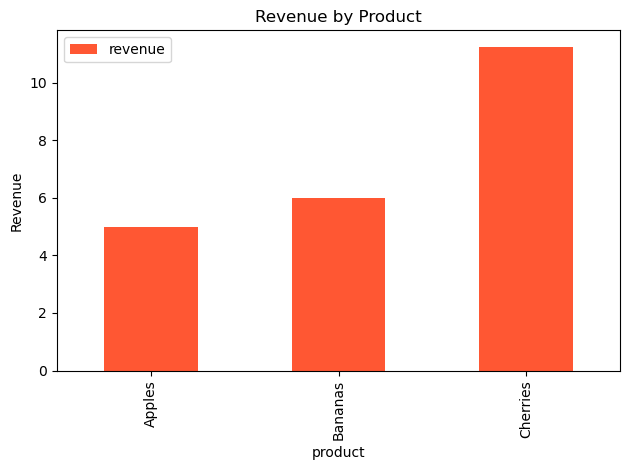

In [20]:
#plot the bar chart
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', color='#FF5733')
plt.ylabel("Revenue")
plt.tight_layout()

In [21]:
#save the chart
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>

In [26]:
conn.close()